In [ ]:
!pip install colorama

In [ ]:
!pip install pyicu
!pip install pycld2
!pip install polyglot
!pip install textstat
!pip install googletrans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
import textstat
from scipy import stats
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving jigsaw-toxic-comment-train.csv.zip to jigsaw-toxic-comment-train.csv.zip


In [ ]:
from google.colab import files
import zipfile
import os

In [ ]:
for zip_filename in uploaded.keys():
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Extract all contents to a temporary directory
        zip_ref.extractall('temp_extracted')

# Move the CSV file to the root folder
csv_file_path = 'temp_extracted/jigsaw-toxic-comment-train/jigsaw-toxic-comment-train.csv'
if os.path.exists(csv_file_path):
    os.rename(csv_file_path, 'jigsaw-toxic-comment-train.csv')

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('temp_extracted/jigsaw-toxic-comment-train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
import os
import shutil

# Move files from temp_extracted directory to main directory
temp_extracted_dir = 'temp_extracted'
main_dir = '.'

# List files in the temp_extracted directory
files_to_move = os.listdir(temp_extracted_dir)

# Move each file to the main directory
for file in files_to_move:
    src = os.path.join(temp_extracted_dir, file)
    dst = os.path.join(main_dir, file)
    shutil.move(src, dst)

# Remove the temp_extracted directory
os.rmdir('temp_extracted')

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving test.csv to test.csv
Saving validation.csv to validation.csv


In [ ]:
import os

# List files in the root folder
files = os.listdir('.')
print("Files in the root folder:")
for file in files:
    print(file)


Files in the root folder:
.config
validation.csv
jigsaw-toxic-comment-train.csv.zip
test.csv
jigsaw-toxic-comment-train.csv
sample_data


In [ ]:
# path configs
TEST_PATH ="test.csv"
VAL_PATH ="validation.csv"
TRAIN_PATH ="jigsaw-toxic-comment-train.csv"

val_data = pd.read_csv(VAL_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)


In [ ]:
val = val_data
train = train_data

def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

val["comment_text"] = clean(val["comment_text"])
test_data["content"] = clean(test_data["content"])
train["comment_text"] = clean(train["comment_text"])

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = rocaucscore(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)

In [ ]:
import tensorflow as tf

# Set AUTOTUNE for optimization
AUTO = tf.data.experimental.AUTOTUNE

# Update the GCS_DS_PATH with the path to your dataset in Google Colab
GCS_DS_PATH = '/content/'

# Define the number of epochs and batch size
EPOCHS = 5
BATCH_SIZE = 32

# Continue with the rest of your code...


In [ ]:
from transformers import DistilBertTokenizer
import os

# Initialize the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

# Define the path to save the tokenizer
SAVE_PATH = "/content/model/"
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Save the tokenizer to the specified directory
tokenizer.save_pretrained(SAVE_PATH)

# Initialize the tokenizer for fast tokenization
fast_tokenizer = DistilBertTokenizer.from_pretrained(SAVE_PATH, lowercase=True)


In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    all_ids = []
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encodings = tokenizer(text_chunk, max_length=maxlen, padding='max_length', truncation=True)
        all_ids.extend(encodings['input_ids'])
    return np.array(all_ids)


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

# Remove TPU setup since it's not available in Google Colab
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# strategy = tf.distribute.experimental.TPUStrategy(tpu)

# Instead, use GPU acceleration if available
if tf.test.gpu_device_name():
    print('GPU is available')
    strategy = tf.distribute.MirroredStrategy()

# Define GCS path to the dataset
GCS_DS_PATH = '/content/'

# Define the number of epochs and batch size
EPOCHS = 2
BATCH_SIZE = 64

In [ ]:
# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')


# Load the fast tokenizer
fast_tokenizer = BertWordPieceTokenizer('/content/working/distilbert_base_uncased/vocab.txt', lowercase=True)

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def fast_encode(texts, tokenizer, maxlen=512):
    all_ids = []

    for text in texts:
        encodings = tokenizer.encode(text)
        all_ids.append(encodings.ids)

    padded_ids = pad_sequences(all_ids, maxlen=maxlen, padding='post', truncating='post')
    return padded_ids

In [ ]:
# Encode the training, validation, and test data
x_train = fast_encode(train.comment_text.astype(str), fast_tokenizer, maxlen=512)
x_valid= fast_encode(val.comment_text.astype(str).values, fast_tokenizer, maxlen=512)
x_test= fast_encode(test_data.content.astype(str).values, fast_tokenizer, maxlen=512)

# Define the labels for validation and training datasets
y_valid = val.toxic.values
y_train = train.toxic.values

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

In [ ]:
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

In [ ]:
class Capsule(Layer):

    def __init__(self,
                 num_capsule,
                 dim_capsule,
                 routings=3,
                 share_weights=True,
                 initializer='glorot_uniform',
                 activation=None,
                 regularizer=None,
                 constraint=None,
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights

        self.activation = activations.get(activation)
        self.regularizer = regularizers.get(regularizer)
        self.initializer = initializers.get(initializer)
        self.constraint = constraints.get(constraint)

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(1,
                                            input_dim_capsule,
                                            self.num_capsule *
                                            self.dim_capsule),
                                     initializer=self.initializer,
                                     regularizer=self.regularizer,
                                     constraint=self.constraint,
                                     trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(input_num_capsule,
                                            input_dim_capsule,
                                            self.num_capsule *
                                            self.dim_capsule),
                                     initializer=self.initializer,
                                     regularizer=self.regularizer,
                                     constraint=self.constraint,
                                     trainable=True)

        self.build = True

    def call(self, inputs):
        if self.share_weights:
            u_hat_vectors = K.conv1d(inputs, self.W)
        else:
            u_hat_vectors = K.local_conv1d(inputs, self.W, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        u_hat_vectors = K.reshape(u_hat_vectors, (batch_size,
                                                  input_num_capsule,
                                                  self.num_capsule,
                                                  self.dim_capsule))

        u_hat_vectors = K.permute_dimensions(u_hat_vectors, (0, 2, 1, 3))
        routing_weights = K.zeros_like(u_hat_vectors[:, :, :, 0])

        for i in range(self.routings):
            capsule_weights = K.softmax(routing_weights, 1)
            outputs = K.batch_dot(capsule_weights, u_hat_vectors, [2, 2])
            if K.ndim(outputs) == 4:
                outputs = K.sum(outputs, axis=1)
            if i < self.routings - 1:
                outputs = K.l2_normalize(outputs, -1)
                routing_weights = K.batch_dot(outputs, u_hat_vectors, [2, 3])
                if K.ndim(routing_weights) == 4:
                    routing_weights = K.sum(routing_weights, axis=1)

        return self.activation(outputs)

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)

In [ ]:
def custom_capsule_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")

    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)

    embedding = SpatialDropout1D(0.3)(embedding)
    capsule = Capsule(num_capsule=5, dim_capsule=5,
                      routings=4, activation=squash)(embedding)

    capsule = Flatten()(capsule)
    output = Dense(128, activation='relu')(capsule)
    output = Dense(1, activation='sigmoid')(output)

    model = Model(inputs=input_word_ids, outputs=output)

    model.compile(Adam(lr=1.5e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
with strategy.scope():
    transformer_layer = (transformers.TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased'))
    model = custom_capsule_model(transformer_layer, max_len=512)

model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer  [(None, 512)]             0         
 )                                                               
                                                                 
 embedding_1 (Embedding)     (None, 512, 768)          91812096  
                                                                 
 spatial_dropout1d_1 (Spati  (None, 512, 768)          0         
 alDropout1D)                                                    
                                                                 
 capsule_1 (Capsule)         (None, 5, 5)              19200     
                                                                 
 flatten_1 (Flatten)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               3328

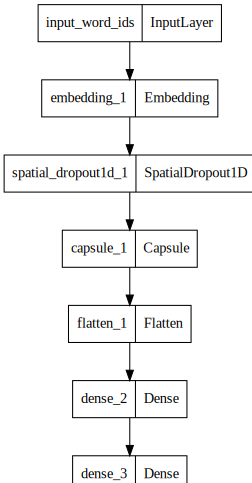

In [ ]:
SVG(tf.keras.utils.model_to_dot(model, dpi=70).create(prog='dot', format='svg'))

In [ ]:
def callback():
    cb = []

    reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.3, patience=3,
                                    verbose=1, mode='auto',
                                    epsilon=0.0001, cooldown=1, min_lr=0.000001)
    cb.append(reduceLROnPlat)
    log = CSVLogger('log.csv')
    cb.append(log)

    RocAuc = RocAucEvaluation(validation_data=(x_valid, y_valid), interval=1)
    cb.append(RocAuc)

    return cb

In [ ]:
from sklearn.metrics import roc_auc_score

def rocaucscore(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

In [ ]:
N_STEPS = x_train.shape[0] // BATCH_SIZE
calls = callback()

train_history = model.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=EPOCHS
)

Epoch 1/2
3492/3492 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.9061
 ROC-AUC - epoch: 1 - score: 0.547604
3492/3492 [==============================] - 610s 175ms/step - loss: 0.2863 - accuracy: 0.9061 - val_loss: 0.5103 - val_accuracy: 0.7580 - lr: 0.0010
Epoch 2/2
3492/3492 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.9059
 ROC-AUC - epoch: 2 - score: 0.557567
3492/3492 [==============================] - 610s 175ms/step - loss: 0.2828 - accuracy: 0.9059 - val_loss: 0.4533 - val_accuracy: 0.8399 - lr: 0.0010


In [ ]:
translator = Translator()

def visualize_model_preds(model, indices=[0, 17, 1, 24]):
    comments = val_data.comment_text.loc[indices].values.tolist()
    preds = model.predict(x_valid[indices].reshape(len(indices), -1))

    for idx, i in enumerate(indices):
        if y_valid[i] == 0:
            label = "Non-toxic"
            color = f'{Fore.GREEN}'
            symbol = '\u2714'
        else:
            label = "Toxic"
            color = f'{Fore.RED}'
            symbol = '\u2716'

        print('{}{} {}'.format(color, str(idx+1) + ". " + label, symbol))
        print(f'{Style.RESET_ALL}')
        print("ORIGINAL")
        print(comments[idx]); print("")
        print("TRANSLATED")
        print(translator.translate(comments[idx]).text)
        fig = go.Figure()
        if list.index(sorted(preds[:, 0]), preds[idx][0]) > 1:
            yl = [preds[idx][0], 1 - preds[idx][0]]
        else:
            yl = [1 - preds[idx][0], preds[idx][0]]
        fig.add_trace(go.Bar(x=['Non-Toxic', 'Toxic'], y=yl, marker=dict(color=["seagreen", "indianred"])))
        fig.update_traces(name=comments[idx])
        fig.update_layout(xaxis_title="Labels", yaxis_title="Probability", template="plotly_white", title_text="Predictions for validation comment #{}".format(idx+1))
        fig.show()


visualize_model_preds(model)

1/1 [==============================] - 2s 2s/step
1. Non-toxic ✔

ORIGINAL
este usuario ni siquiera llega al rango de    hereje   . por lo tanto debería ser quemado en la barbacoa para purificar su alma y nuestro aparato digestivo mediante su ingestión.    skipe linkin 22px   honor, valor, leltad.      17:48 13 mar 2008 (utc)

TRANSLATED


AttributeError: 'NoneType' object has no attribute 'group'